In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('InsNova_train.csv')
df['pure_premium'] = df['claim_cost'] / df['exposure']
df['severity'] = df['claim_cost'] / np.fmax(df['claim_count'], 1) # severity= avg_cost
df['frequency'] = df['claim_count'] / df['exposure']
df1=df.loc[~(df['pure_premium']==0)]
df1.reset_index(drop=True)
for i in ['veh_age', 'dr_age']:
    df[i] = df[i].astype('category')

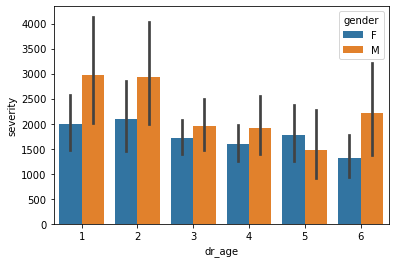

In [3]:
ax = sns.barplot(x="dr_age", y="severity", hue="gender", data=df1)

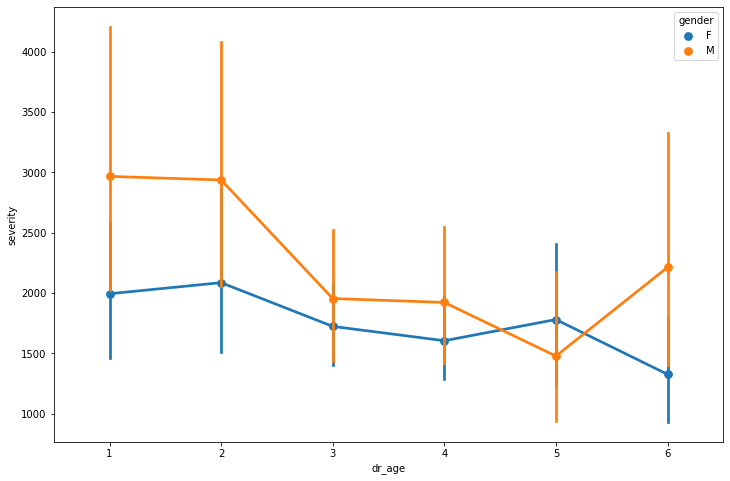

In [4]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
ax = sns.pointplot(x="dr_age", y="severity", hue="gender",data=df1)


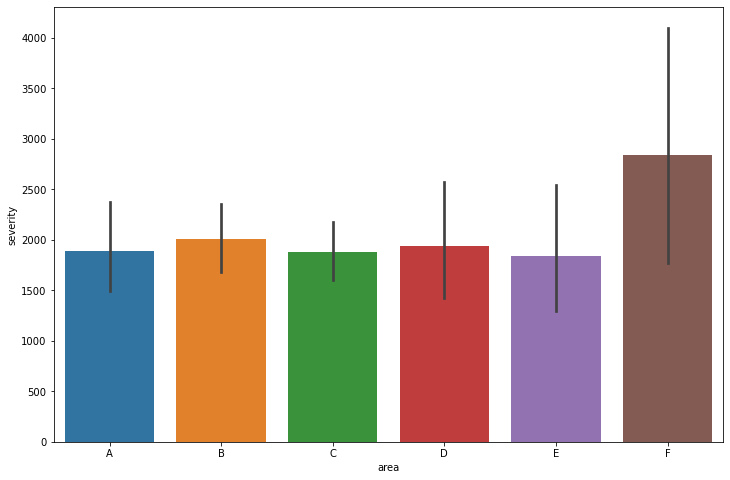

In [5]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
ax = sns.barplot(x="area", y="severity", data=df1)

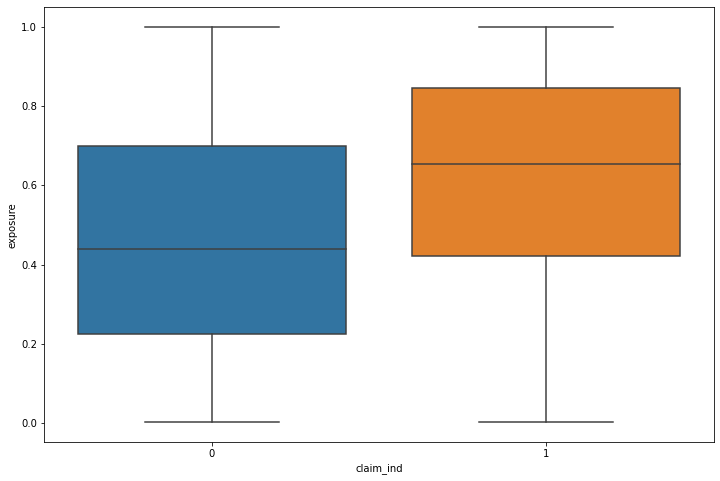

In [6]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
ax = sns.boxplot(x="claim_ind", y="exposure", data=df)

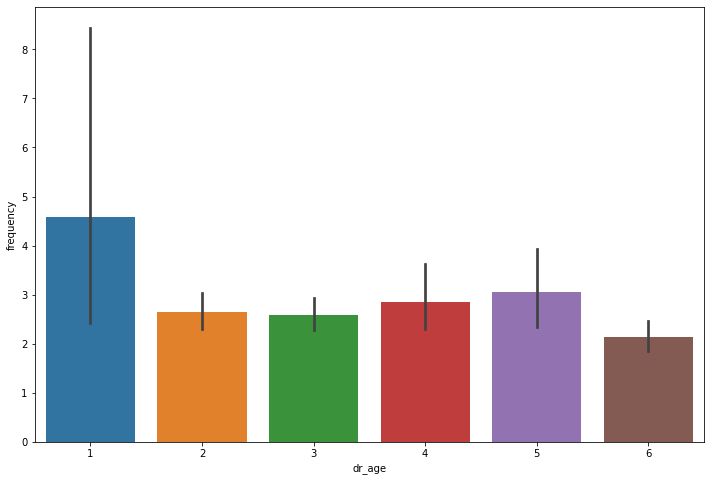

In [7]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
ax = sns.barplot(x="dr_age", y="frequency", data=df1)

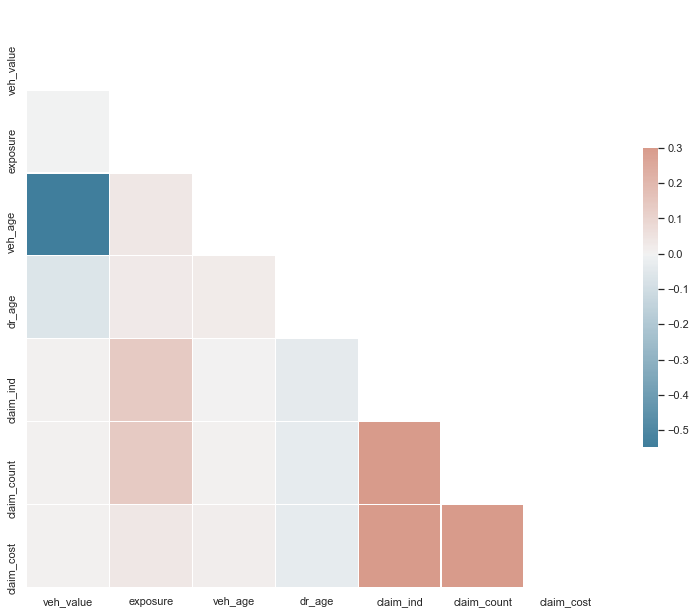

In [18]:

df = pd.read_csv('InsNova_train.csv')
sns.set_theme(style="white")
df=df.drop("id",axis=1)
corr = df.corr()
#corr1 = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('our_plot_name.jpg', format='jpeg', dpi=350)